## 2. 데이터 수집

In [1]:
import pandas as pd
import numpy as np

train = pd.read_csv('class_data/train.csv')
test = pd.read_csv('class_data/test.csv')
submission = pd.read_csv('class_data/sample_submission.csv')

In [2]:
train1 = train.copy()

# 3. 탐색적 데이터 분석 및 전처리(EDA:Exploratory Data Analysis)
- 데이터를 이해하자!
- 결측치, 이상치, 오류가 있는지 확인
    - 결측치 : 컬럼의 값이 없는 데이터
    - 이상치 : 다른 값들과 차이가 큰 값
    - 오류치 >> 이상치 >> 결측치 순으로 데이터 전처리하기!
- 기술 통계
- 상관 관계
- 시각화
### 데이터 전처리 방법
- 통합(Grouping, 범주형 데이터의 클래스가 너무 많을 시, 사용),
- 인코딩,
- 정규화,
- 라벨 인코딩 등을 통해 데이터 전처리

In [3]:
train1.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29305 entries, 0 to 29304
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   no              29305 non-null  int64 
 1   age             29305 non-null  int64 
 2   workclass       29305 non-null  object
 3   fnlwgt          29305 non-null  int64 
 4   education       29305 non-null  object
 5   education-num   29305 non-null  int64 
 6   marital-status  29305 non-null  object
 7   occupation      29305 non-null  object
 8   relationship    29305 non-null  object
 9   race            29305 non-null  object
 10  sex             29305 non-null  object
 11  capital-gain    29305 non-null  int64 
 12  capital-loss    29305 non-null  int64 
 13  hours-per-week  29305 non-null  int64 
 14  native-country  29305 non-null  object
 15  income          29305 non-null  int64 
dtypes: int64(8), object(8)
memory usage: 3.6+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex:

(None, None)

In [4]:
train1.columns

Index(['no', 'age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

#### <속성 정보>
- 나이: 연속.
- 작업 클래스: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, 무급, 무직.
- fnlwgt: 연속.
- 학력: 학사, 일부 대학, 11학년, 고등학교 대학원, Prof-school, Assoc-acdm, Assoc-voc, 9, 7-8, 12, 석사, 1-4, 10, 박사, 5-6, 유아원.
- 교육 번호: 연속.
- 결혼 상태: 기혼-시민-배우자, 이혼, 미혼, 별거, 사별, 기혼-배우자-부재, 기혼-AF-배우자.
- 직업: 기술 지원, 공예 수리, 기타 서비스, 판매, 간부 관리, 전문 전문, 핸들러-청소부, 기계 작동 검사, Adm-사무, 농업-낚시, 운송-이사, Priv-house- serv, Protective-serv, 군대.
- 관계: 아내, 자녀, 남편, 가족 외, 친척, 미혼.
- 인종: 백인, Asian-Pac-Islander, Amer-Indian-Eskimo, 기타, 흑인.
- 성별: 여성, 남성.
- 자본 이득: 연속.
- 자본 손실: 계속.
- 주당 시간: 연속.
- 출신국: 미국, 캄보디아, 영국, 푸에르토리코, 캐나다, 독일, 미국 외곽(괌-USVI 등), 인도, 일본, 그리스, 남부, 중국, 쿠바, 이란, 온두라스, 필리핀, 이탈리아 , 폴란드, 자메이카, 베트남, 멕시코, 포르투갈, 아일랜드, 프랑스, ​​도미니카 공화국, 라오스, 에콰도르, 대만, 아이티, 콜롬비아, 헝가리, 과테말라, 니카라과, 스코틀랜드, 태국, 유고슬라비아, 엘살바도르, 트리나다드 토바고, 페루, 홍 , 네덜란드-네덜란드.

- 연속(수치형) 데이터 : age, fnlwgt, education-num, capital-gain, capital-loss, hours-per-week
- 범주형 데이터 : workclass, education, marital-status, occupation, relationship, race, sex, native-country

In [5]:
def strip_data(df) :
    for col in df.columns :
        try :
            df[col] = [d.strip() for d in df[col]]
        except :
            df[col] = [int(str(d).strip()) for d in df[col]]
    return print('공백 제거 완료.')
strip_data(train1)
strip_data(test)

공백 제거 완료.
공백 제거 완료.


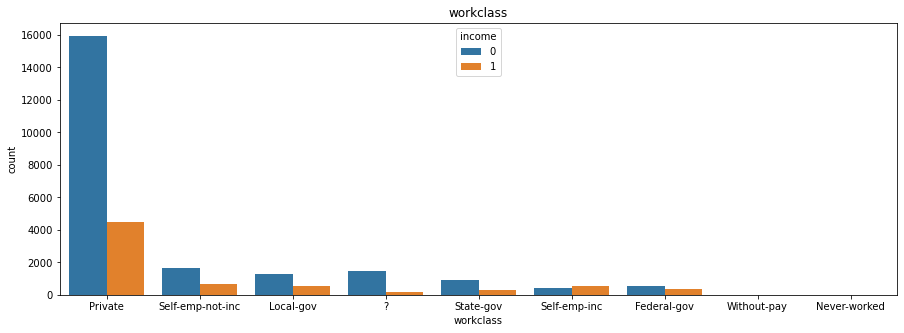

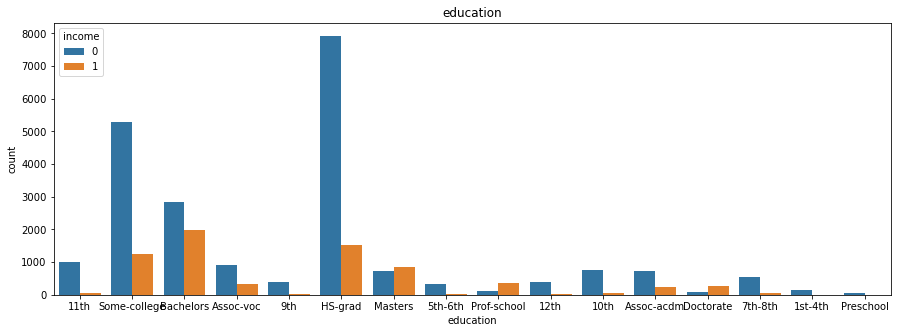

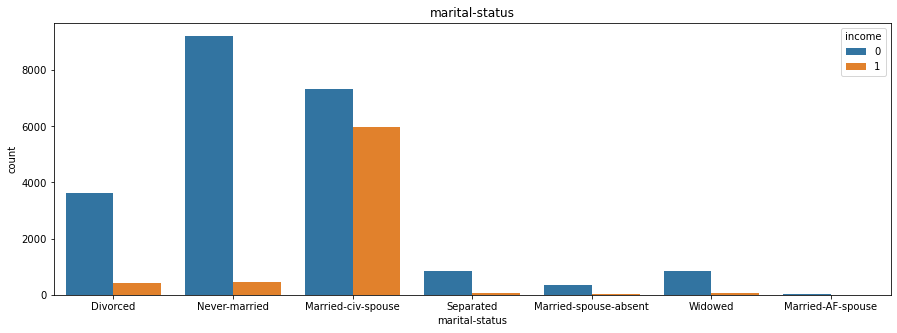

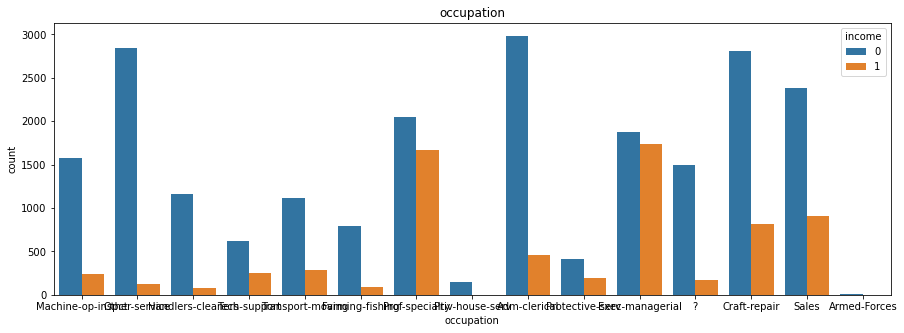

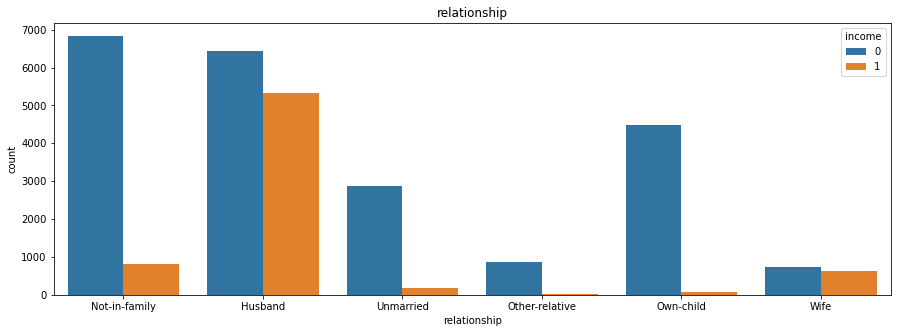

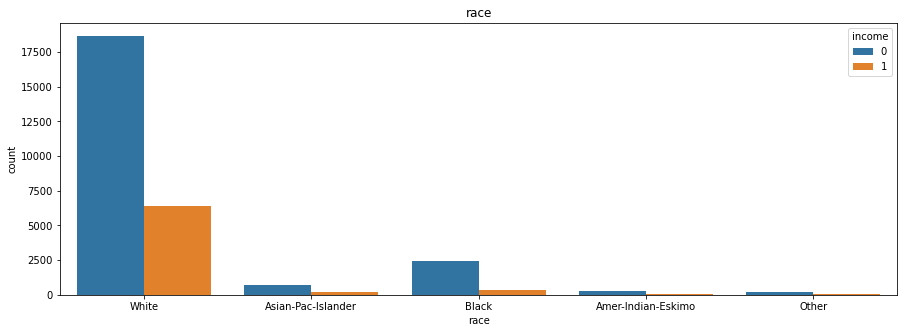

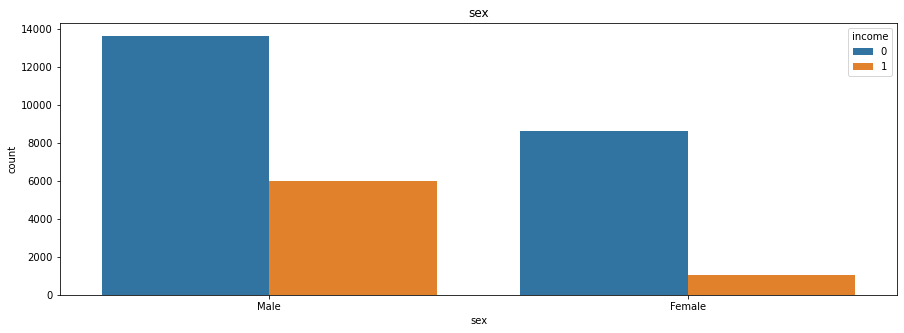

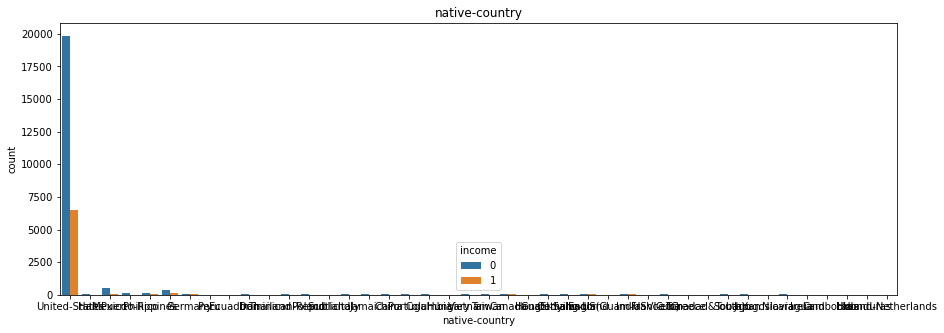

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

class_col = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

for col in class_col :
    plt.figure(figsize=(15,5))
    sns.countplot(
        data = train1,
        x = col,
        hue = 'income'
    )
    plt.title(col)
    plt.show()

## ?를 쉽게 세는 법

In [7]:
def data_info(df) :
    for col in df.columns :
        try:
            null = df[col].value_counts().loc["?"]
        except:
            null = 0
        print(f'{col:10s}\t{len(df[col]) - null} non-null')
data_info(train1)
#data_info(test)

no        	29305 non-null
age       	29305 non-null
workclass 	27642 non-null
fnlwgt    	29305 non-null
education 	29305 non-null
education-num	29305 non-null
marital-status	29305 non-null
occupation	27637 non-null
relationship	29305 non-null
race      	29305 non-null
sex       	29305 non-null
capital-gain	29305 non-null
capital-loss	29305 non-null
hours-per-week	29305 non-null
native-country	28810 non-null
income    	29305 non-null


- 결측치 데이터 있는 칼럼 :workclass, occupation, native-country

In [8]:
# def drop_data(df) :
#     data = df.copy()
#     for col in data.columns :
#         data = data[~(data[col].isin(['?']))]
#     return data
# train1 = drop_data(train1)
# data_info(train1)

In [9]:
pd.set_option('display.max_columns', None)
train1.corr()

,no,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income
no,1.000000,0.001111,0.002347,-0.008466,0.003916,0.003246,0.003166,-0.004080
age,0.001111,1.000000,-0.075753,0.035084,0.078498,0.054413,0.073100,0.238460
fnlwgt,0.002347,-0.075753,1.000000,-0.030600,-0.005051,-0.001513,-0.010154,-0.002994
education-num,-0.008466,0.035084,-0.030600,1.000000,0.127651,0.083925,0.147569,0.331798
capital-gain,0.003916,0.078498,-0.005051,0.127651,1.000000,-0.031401,0.088609,0.221387
capital-loss,0.003246,0.054413,-0.001513,0.083925,-0.031401,1.000000,0.055271,0.135645
hours-per-week,0.003166,0.073100,-0.010154,0.147569,0.088609,0.055271,1.000000,0.231045
income,-0.004080,0.238460,-0.002994,0.331798,0.221387,0.135645,0.231045,1.000000


### 범주형 데이터 시각화

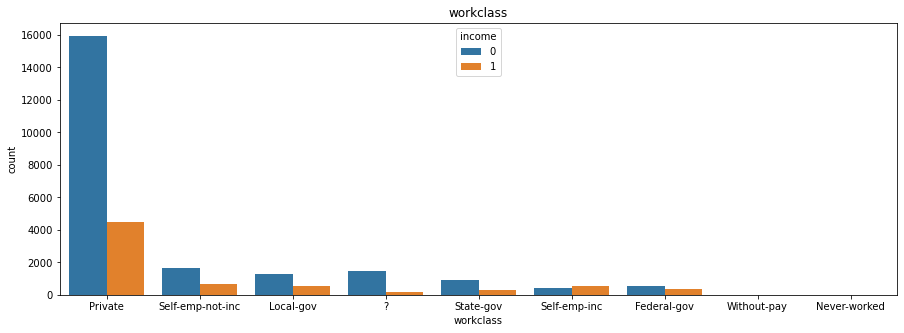

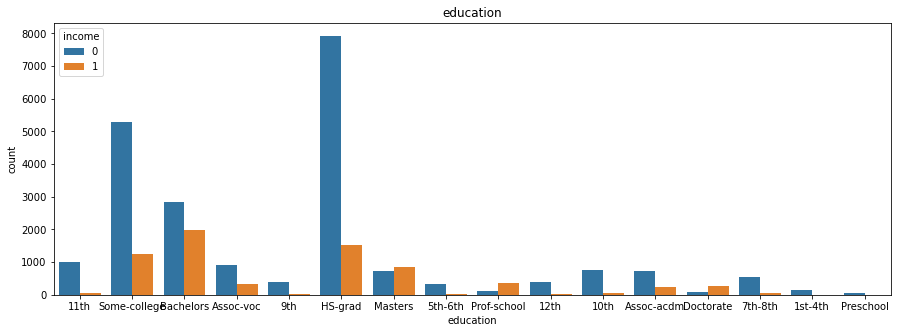

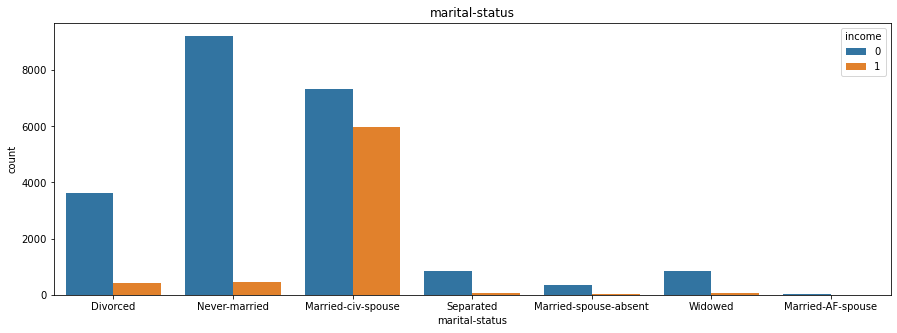

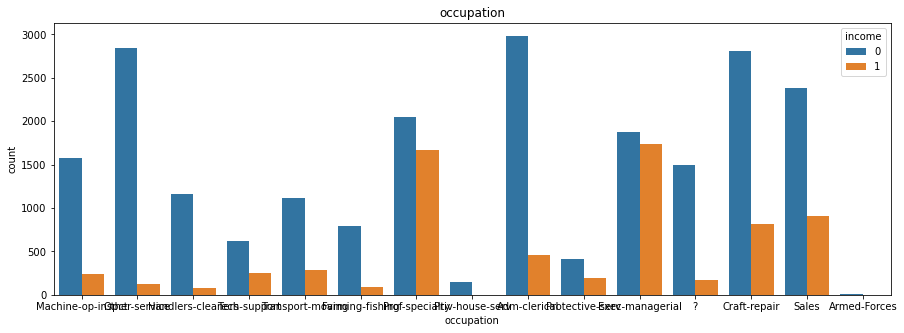

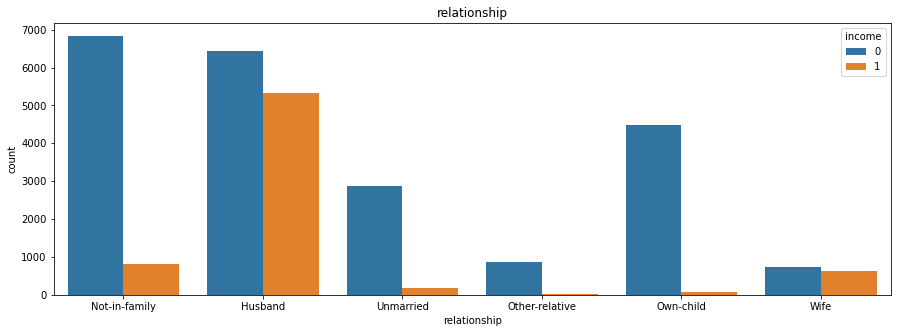

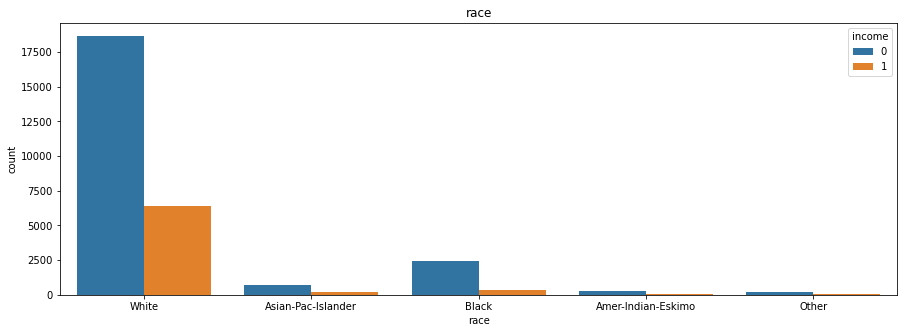

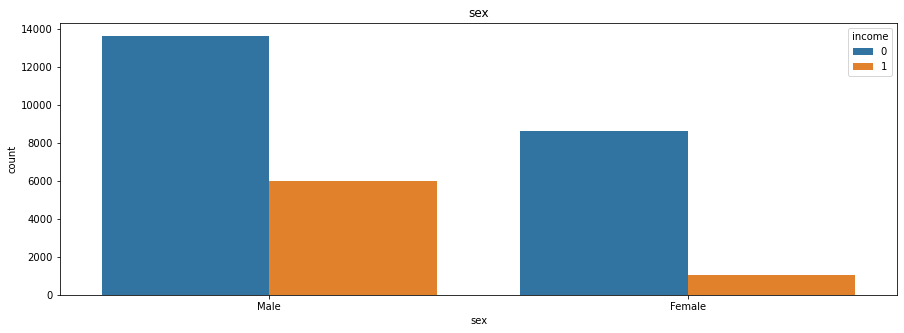

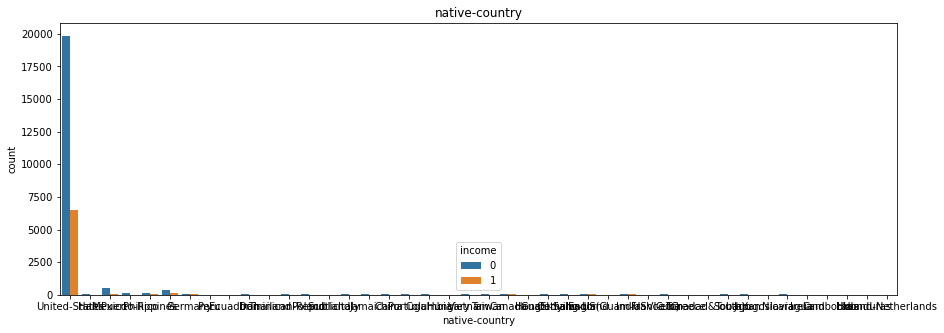

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

class_col = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

for col in class_col :
    plt.figure(figsize=(15,5))
    sns.countplot(
        data = train1,
        x = col,
        hue = 'income'
    )
    plt.title(col)
    plt.show()

### 결측치 제거 및 분리

### 범주형 데이터 인코딩

In [11]:
data_info(test)

no        	19537 non-null
age       	19537 non-null
workclass 	18401 non-null
fnlwgt    	19537 non-null
education 	19537 non-null
education-num	19537 non-null
marital-status	19537 non-null
occupation	18396 non-null
relationship	19537 non-null
race      	19537 non-null
sex       	19537 non-null
capital-gain	19537 non-null
capital-loss	19537 non-null
hours-per-week	19537 non-null
native-country	19175 non-null


### 수치형 데이터 시각화

- capital-gain, -loss = 0 일 때, 대부분 income =0

In [12]:
train1['capital'] = train1['capital-gain'] - train1['capital-loss']
test['capital'] = test['capital-gain'] - test['capital-loss']

In [13]:
train1 = train1.loc[:, ['age', 'workclass', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital', 'hours-per-week', 'native-country',
       'income']]

In [14]:
test1 = test.loc[:, ['age', 'workclass', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital', 'hours-per-week', 'native-country']]

In [15]:
# 원핫인코딩
categorical_features = ['workclass','marital-status', 'relationship', 'occupation', 'race', 'sex', 'native-country']

for feature_name in categorical_features :
    # prefix : 접두어. / 같은 category를 가진 특성이 여러개 일 경우, 접두어를 붙여 특성의 category를 구분. qh
    one_hot = pd.get_dummies(train1[feature_name], prefix = feature_name)
    train1 = pd.concat([train1,one_hot], axis = 1)
    train1.drop(feature_name, axis=1, inplace = True)

In [16]:
# 원핫인코딩
categorical_features = ['marital-status', 'relationship', 'race', 'sex', 'native-country']

for feature_name in categorical_features :
    # prefix : 접두어. / 같은 category를 가진 특성이 여러개 일 경우, 접두어를 붙여 특성의 category를 구분. qh
    one_hot = pd.get_dummies(test1[feature_name], prefix = feature_name)
    test1 = pd.concat([test1,one_hot], axis = 1)
    test1.drop(feature_name, axis=1, inplace = True)

In [43]:
col = ['age', 'education-num', 'capital', 'hours-per-week',
       'workclass_?', 'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'workclass_Without-pay', 'marital-status_Divorced',
       'marital-status_Married-AF-spouse', 'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent', 'marital-status_Never-married',
       'marital-status_Separated', 'marital-status_Widowed',
       'relationship_Husband', 'relationship_Not-in-family',
       'relationship_Other-relative', 'relationship_Own-child',
       'relationship_Unmarried', 'relationship_Wife', 'occupation_?',
       'occupation_Adm-clerical', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Machine-op-inspct', 'occupation_Other-service',
       'occupation_Priv-house-serv', 'occupation_Prof-specialty',
       'occupation_Protective-serv', 'occupation_Sales',
       'occupation_Tech-support', 'occupation_Transport-moving',
       'race_Amer-Indian-Eskimo', 'race_Asian-Pac-Islander', 'race_Black',
       'race_Other', 'race_White', 'sex_Female', 'sex_Male']

In [44]:

train1.corr()

,age,education-num,capital,hours-per-week,income,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,marital-status_Divorced,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,occupation_?,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male,native-country_?,native-country_Cambodia,native-country_Canada,native-country_China,native-country_Columbia,native-country_Cuba,native-country_Dominican-Republic,native-country_Ecuador,native-country_El-Salvador,native-country_England,native-country_France,native-country_Germany,native-country_Greece,native-country_Guatemala,native-country_Haiti,native-country_Holand-Netherlands,native-country_Honduras,native-country_Hong,native-country_Hungary,native-country_India,native-country_Iran,native-country_Ireland,native-country_Italy,native-country_Jamaica,native-country_Japan,native-country_Laos,native-country_Mexico,native-country_Nicaragua,native-country_Outlying-US(Guam-USVI-etc),native-country_Peru,native-country_Philippines,native-country_Poland,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
age,1.000000,0.035084,0.075351,0.073100,0.238460,0.029950,0.051267,0.055062,-0.019066,-0.191909,0.094419,0.145714,0.014432,0.017806,0.127705,-0.015573,0.313983,0.022621,-0.538205,0.012777,0.274087,0.313752,-0.005679,-0.069069,-0.435246,0.042289,0.025381,0.028833,-0.037516,-0.011641,0.008755,0.098262,0.031383,-0.089044,-0.013103,-0.081817,0.018611,0.052595,0.000814,-0.031907,-0.021934,0.027034,-0.007604,-0.007804,-0.021238,-0.031182,0.031707,-0.083999,0.083999,0.001883,-0.001904,0.024124,0.007853,0.006081,0.037808,-0.001973,-0.008893,-0.022737,0.007645,-0.002965,-0.000870,0.019775,-0.018146,-0.001169,-0.002830,-0.007466,-0.008830,0.018174,-0.005309,0.000756,0.006458,0.018975,-0.005719,0.000023,-0.002661,-0.054606,-0.006466,-0.001524,0.001915,0.007659,0.007367,0.002053,0.006689,0.019706,0.002682,-0.013193,0.003635,0.000169,0.011756,-0.015880,0.004885
education-num,0.035084,1.000000,0.122777,0.147569,0.331798,-0.078277,0.056834,0.097920,-0.019735,-0.121684,0.080657,0.019803,0.106694,-0.009841,-0.009202,0.004592,0.083389,-0.033628,-0.028103,-0.051393,-0.070619,0.076249,0.058241,-0.081856,-0.101407,-0.062767,0.033974,-0.079279,0.002775,-0.001316,-0.137739,0.198739,-0.102369,-0.123739,-0.158979,-0.171442,-0.068471,0.415499,0.004762,0.032144,0.061117,-0.115410,-0.028848,0.063351,-0.072654,-0.046771,0.049246,-0.017029,0.017029,0.027084,-0.010211,0.015946,0.022723,-0.016999,-0.017564,-0.054491,-0.007315,-0.072948,0.018070,0.018982,0.024073,-0.008675,-0.066645,-0.020142,-0.000189,-0.019131,-0.000302,0.007220,0.051711,0.030932,-0.004698,-0.024373,-0.004318,0.019662,0.002472,-0.226100,-0.007445,0.001617,-0.005037,0.021566,0.003936,-0.039738,-0.045836,-0.006628,0.012659,0.044341,0.016290,-0.008877,0.109316,-0.003909,0.001211
capital,0.075351,0.122777,1.000000,0.085385,0.213463,-0.016761,-0.004566,-0.017919,-0.001733,-0.033972,0.105674,0.028769,-0.010591,-0.002144,-0.014111,-0.002595,0.079358,-0.004104,-0.065189,-0.00798

In [45]:
X_train = train1.loc[:,col]
y_train = train1.loc[:,'income']

### TEST 데이터 정리

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [ ]:
# KNN 모델

for i in range(10) :
    X_train2, X_val, y_train2, y_val = train_test_split(X_train1, y_train1, test_size = 0.3, random_state=i)
    train_acc = []
    test_acc = []

    neighbor = range(5, 30, 2)
    for k in neighbor :
        knn_model2 = KNeighborsClassifier(n_neighbors=k)
        knn_model2.fit(X_train2, y_train2)
        train_acc.append(knn_model2.score(X_train2, y_train2))
        test_acc.append(knn_model2.score(X_val, y_val))
    plt.plot(neighbor, train_acc, c='r', label = 'train')
    plt.plot(neighbor, test_acc, c='b', label = 'test')
    plt.xticks( range(5, 30, 2))
    plt.grid()
    plt.title(f'knn_model({i})')
    plt.legend(loc='upper right')
    plt.show()

In [ ]:
 X_train2, X_val, y_train2, y_val = train_test_split(X_train1, y_train1, test_size = 0.3, random_state=2)
    
knn_model2 = KNeighborsClassifier(n_neighbors=23)
knn_model2.fit(X_train2, y_train2)
knn_pre = knn_model2.predict(X_test1)
null_train['workclass'] = knn_pre


In [ ]:
X_train2, X_val, y_train2, y_val = train_test_split(X_train, y_train, test_size = 0.3, random_state=8)

knn_model2 = KNeighborsClassifier(n_neighbors=17)
knn_model2.fit(X_train2, y_train2)
knn_pre = knn_model2.predict(X_test1)
submission['income'] = knn_pre
submission.to_csv('class_data/KNN_pre.csv', index = False)

In [ ]:
# 결정 트리 : max_depth
from sklearn.tree import DecisionTreeClassifier

for i in [25,43,75,98] :
    X_train2, X_val, y_train2, y_val = train_test_split(X_train, y_train, test_size = 0.3, random_state=i)
    train_acc = []
    test_acc = []

    max_depth = range(1, 20, 1)
    for d in max_depth :
        dt_model = DecisionTreeClassifier(max_depth = d)
        dt_model.fit(X_train2, y_train2)
        train_acc.append(dt_model.score(X_train2, y_train2))
        test_acc.append(dt_model.score(X_val, y_val))
    plt.plot(max_depth, train_acc, c='r', label = 'train')
    plt.plot(max_depth, test_acc, c='b', label = 'test')
    plt.xticks(max_depth, range(1, 20, 1))
    plt.grid()
    plt.title(f'DecisionTree_model({i})')
    plt.legend(loc='upper right')
    plt.show()

In [ ]:
# 9 /12 /
X_train2, X_val, y_train2, y_val = train_test_split(X_train, y_train, test_size = 0.3, random_state=98)
train_acc = []
test_acc = []

dt_model = DecisionTreeClassifier(max_depth = 10)
dt_model.fit(X_train2, y_train2)
dt_pre = dt_model.predict(test1)
submission['income'] = dt_pre
submission.to_csv('class_data/dt_pre_by_MDepth.csv', index = False)

In [ ]:
# 결정 트리 : min_sample_split

X_train2, X_val, y_train2, y_val = train_test_split(X_train, y_train, test_size = 0.3, random_state=20)
train_acc = []
test_acc = []

min_sample_splt = range(170,200,1)
for d in min_sample_splt :
    dt_model = DecisionTreeClassifier(min_samples_split = d)
    dt_model.fit(X_train2, y_train2)
    train_acc.append(dt_model.score(X_train2, y_train2))
    test_acc.append(dt_model.score(X_val, y_val))
plt.figure(figsize= (25,5))
plt.plot(min_sample_splt, train_acc, c='r', label = 'train')
plt.plot(min_sample_splt, test_acc, c='b', label = 'test')
plt.xticks(range(170,200,1))
plt.grid()
plt.title(f'DecisionTree_model({i})')
plt.legend(loc='upper right')
plt.show()

In [ ]:
#27-130/74-120/
X_train2, X_val, y_train2, y_val = train_test_split(X_train, y_train, test_size = 0.3, random_state=16)
train_acc = []
test_acc = []

dt_model = DecisionTreeClassifier(min_samples_split = 185)
dt_model.fit(X_train2, y_train2)
dt_pre = dt_model.predict(test1)
submission['income'] = dt_pre
submission.to_csv('class_data/dt_pre_by_mSmpleSplt.csv', index = False)

In [ ]:
# 결정 트리 : max_leaf_nodes
#
for i in [0, 20, 98] :
    X_train2, X_val, y_train2, y_val = train_test_split(X_train, y_train, test_size = 0.3, random_state=i)
    train_acc = []
    test_acc = []

    max_leaf_nod = range(70,150,1)
    for d in max_leaf_nod :
        dt_model = DecisionTreeClassifier(max_leaf_nodes = d)
        dt_model.fit(X_train2, y_train2)
        train_acc.append(dt_model.score(X_train2, y_train2))
        test_acc.append(dt_model.score(X_val, y_val))
    plt.figure(figsize= (25,5))
    plt.plot(max_leaf_nod, train_acc, c='r', label = 'train')
    plt.plot(max_leaf_nod, test_acc, c='b', label = 'test')
    plt.xticks(range(70,150,1))
    plt.grid()
    plt.title(f'DecisionTree_model({i})')
    plt.legend(loc='upper right')
    plt.show()

In [ ]:
X_train2, X_val, y_train2, y_val = train_test_split(X_train, y_train, test_size = 0.3, random_state=98)
train_acc = []
test_acc = []

dt_model = DecisionTreeClassifier(max_leaf_nodes = 113)
dt_model.fit(X_train2, y_train2)
dt_pre = dt_model.predict(test1)
submission['income'] = dt_pre
submission.to_csv('data/dt_pre_by_MLeafNodes.csv', index = False)

In [ ]:
# 결정 트리 : min_samples_leaf
#[0, 8, 10, 11, 13-23,19-21*,23-28, 27-42,33-38*,34-28, 38-31, 43-40, 47-40]
for i in [98] :
    X_train2, X_val, y_train2, y_val = train_test_split(X_train, y_train, test_size = 0.3, random_state=i)
    train_acc = []
    test_acc = []

    min_samples_leaf = range(1,100,1)
    for d in min_samples_leaf :
        dt_model = DecisionTreeClassifier(min_samples_leaf= d)
        dt_model.fit(X_train2, y_train2)
        train_acc.append(dt_model.score(X_train2, y_train2))
        test_acc.append(dt_model.score(X_val, y_val))
    plt.figure(figsize= (25,5))
    plt.plot(min_samples_leaf, train_acc, c='r', label = 'train')
    plt.plot(min_samples_leaf, test_acc, c='b', label = 'test')
    plt.xticks(range(1,100,1))
    plt.grid()
    plt.title(f'DecisionTree_model({i})')
    plt.legend(loc='upper right')
    plt.show()

In [49]:
from sklearn.ensemble import RandomForestClassifier

for i in range(100) :
    X_train2, X_val, y_train2, y_val = train_test_split(X_train, y_train, test_size = 0.3, random_state=i)
    train_acc = []
    test_acc = []

    min_samples_leaf = range(1, 100, 1) 
    for d in min_samples_leaf :
        rf_model = RandomForestClassifier(
                        n_estimators = 100,   # 깅할 모델 갯수
                        max_features = 0.5,   # 각 모델이 랜덤하게 사용할 특성 수
                        max_depth =10,        # 각 모델의 최대 깊이
                        min_samples_leaf = i,# 리프 노드의 최소 샘플 수
                        random_state = 98     # 난수 고정
                                 )
        rf_model.fit(X_train2, y_train2)
        train_acc.append(rf_model.score(X_train2, y_train2))
        test_acc.append(rf_model.score(X_val, y_val))
    plt.figure(figsize= (25,5))
    plt.plot(min_samples_leaf, train_acc, c='r', label = 'train')
    plt.plot(min_samples_leaf, test_acc, c='b', label = 'test')
    plt.xticks(range(1,100,1))
    plt.grid()
    plt.title(f'DecisionTree_model({i})')
    plt.legend(loc='upper right')
    plt.show()

ValueError: min_samples_leaf must be at least 1 or in (0, 0.5], got 0

age 0.2403102095282277
capital 0.1365760467790293
education-num 0.13437812714662173
hours-per-week 0.12143796664037376
marital-status_Married-civ-spouse 0.07257715922428835
relationship_Husband 0.05026370216105378
marital-status_Never-married 0.024671600259941542
occupation_Exec-managerial 0.020387004842813077
occupation_Prof-specialty 0.017721956873075498
relationship_Not-in-family 0.0103931956923557
relationship_Wife 0.010037239027208215
workclass_Private 0.010036028308861902
workclass_Self-emp-not-inc 0.009295081678997457
sex_Female 0.009036153551482181
relationship_Own-child 0.008835792450569225
occupation_Other-service 0.008103905350260676
sex_Male 0.008047447824707886
occupation_Sales 0.007330139729192332
race_White 0.007316720974337993
occupation_Craft-repair 0.006683584332082208
marital-status_Divorced 0.006594575846906501
workclass_Local-gov 0.0059706244756824725
workclass_Self-emp-inc 0.0059016435722599875
occupation_Adm-clerical 0.005428674026152689
race_Black 0.005359455432

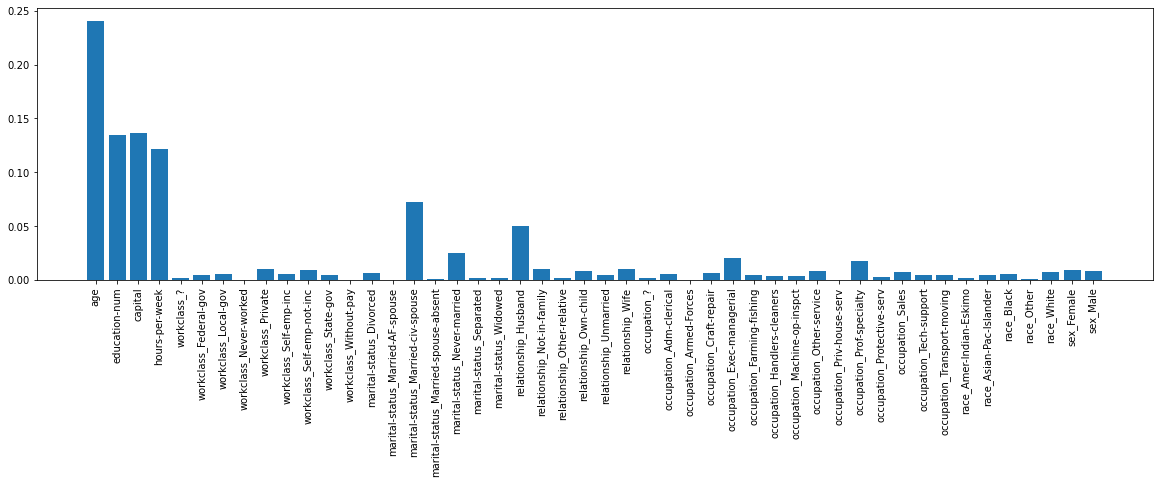

In [46]:
feat_labels = X_train.columns

rf = RandomForestClassifier(n_estimators = 1000, random_state = 0, n_jobs = -1)

rf.fit(X_train, y_train)
importances = rf.feature_importances_

# argsort : 리스트 인덱스의 정렬됐을 때의 인덱스 값 반환, [::-1] : 뒤집기
indices = np.argsort(importances)[::-1]

# for i in range(X_train.shape[1]):
# 	print(feat_labels[indices[i]], importances[indices[i]])
plt.figure(figsize = (20, 5))
plt.bar(feat_labels, importances)
plt.xticks(feat_labels, rotation = 90)
plt.show()

In [26]:
col = ['age', 'education-num','capital','hours-per-week']

In [27]:
X_train = train1.loc[:,col]
y_train = train1.loc[:,'income']

In [28]:
X_train2, X_val, y_train2, y_val = train_test_split(X_train, y_train, test_size = 0.3, random_state=i)

In [41]:
from tqdm import trange
max_ = 0
for i in [i/100 for i in range(50,80)]:
    rf = RandomForestClassifier(
        n_estimators = 100,   # 깅할 모델 갯수
        max_features = i,   # 각 모델이 랜덤하게 사용할 특성 수
        max_depth =10,        # 각 모델의 최대 깊이
        min_samples_leaf = 25,# 리프 노드의 최소 샘플 수
        random_state = 98,     # 난수 고정 98
        n_jobs = -1
                                 )

    rf.fit(X_train2, y_train2)
    score = rf.score(X_val,y_val)
    if score > max_ :
        print(f'max_featuer:{i} / score : {score}')
        max_ = score

max_featuer:0.5 / score : 0.8304140127388535
max_featuer:0.75 / score : 0.8320063694267515


In [ ]:
# 그리드 서치
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# 탐색하고 싶은 하이퍼파라미터 조합을 딕셔너리로 생성
param_grid = {
    'max_depth' : range(7, 11, 1),
    'n_estimators' : range(70, 110, 10),
    'max_features' : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
    'min_samples_leaf' : range(15, 30, 1)
}
for i in range(100) :
    train_acc = []
    train.param = []
    model = RandomForestClassifier(random_state = i)
    grid = GridSearchCV(model,param_grid, cv=5, n_jobs = -1) # 튜닝할 모델, 사용할 파라미터, 교차검증 횟수(-1: 다 쓰는 것)
    grid.fit(X_train, y_train)
    #best_model = grid.best_estimator

    train_acc.append(grid.best_score_) # 최고 조합의 정확도 반환
#     train_param.append(grid.best_params_) # 최고 조합의 매개 변수 반환
    
    plt.plot(range(100), train_acc, c='r', label = 'train')
    #plt.plot(range(100), train_param, c='b', label = 'test')
    plt.xticks(range(100))
    plt.grid()
    plt.title(f'GridSearchCV({i})')
    plt.legend(loc='upper right')
    plt.show()
# # 최고 조합으로 학습 완료된 모델
# best_model = grid.best_estimator_ 
# pre = best_model.predict(X_test)
# submission['Survived'] = pre
# submission.to_csv('data/rf_pre.csv', index = False)

In [ ]:
# 랜덤 포레스트
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth' : 7,
    'n_estimators' : range(70, 110, 10),
    'max_features' : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
    'min_samples_leaf' : 31
}
model = RandomForestClassifier(random_state = 720)
grid = GridSearchCV(model,param_grid, cv=5, n_jobs = -1)
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
pre = best_model.predict(X_test)

In [ ]:
submission['income'] = pre
submission.to_csv('class_data/pre_rf_gridSearch.csv', index = False)

## 3.1 결측치 확인

### 결측치 채우는 방법
- 수치형 데이터
    - 기술 통계(평균 or 중간값)
    - 결측치가 적은 경우 : 전체 평균이나 중간값을 대입
    - 결측치가 많은 경우(20~30%) : 결측치가 있는 데이터의 다른 컬럼과 같은 값을 갖는(동일한 특성을 갖는) 데이터의 결측치 통계(평균, or 중간값)를 사용 (피벗 테이블을 이용할 것임)
- 범주형 데이터
    - 결측치가 적은 경우 : 데이터 수가 가장 많은 클래스로 할당 >> 기존 데이터가 결측치가 있는 데이터에 의해 영향을 덜 받기 때문에)
    - 결측치가 많은 경우 : 데이터 수가 가장 많은 클래스로 할당 >> 편향이 됨 >> 기존 데이터의 개수 비율만큼 랜덤으로 할당

## 3.7 데이터 시각화 하기
- test데이터를 활용하지 않고 train데이터를 이용해서 시각화/탐색하는게 좋다.

- 범주형 데이터(Categorical Data) 시각화
- 빈도 기반의 bar chart 많이 활용

- 수치형 데이터 시각화
    - 구간을 나눠서 종합하는 히스토그램
    - 커널 밀도 추정 그래프
    
- 바이올린 플롯 그래프 시각화
    - 박스 + KDE 그래프
- 텍스트 데이터
    - 비정형 데이터 >> 단어 중심 시각화
    - wordcloud
- 빈도 기반의 시각화 가능 : countplot

## 4. 특성 공학(Feature Engineering)
- feature에서 유의미한 컬럼을 추출하거나 병합하는 행위

### 4.2 비정형 데이터 다루기(Name)
- 틀이 없는, 형태가 정해져 있지 않음
- 텍스트 데이터, 이미지 데이터, 음성 데이터

###  사용하지 않을 칼럼 정리

## 모델링
- 인코딩(문자 형태의 데이터를 숫자 형태로 변환)
    - label encoding : 순서가 있는 범주형 데이터에 사용
    - one-hot-encoding : 순서가 없는 범주형 데이터에 사용 / pd.get_dummies(데이터)
        - 순서가 없는 범주형 데이터 : 성별
        - 순서가 있는 범주형 데이터 : 학점
- 특성 선택(feature selection) : 상관계수(.corr() : 양수-비례관계, 음수-반비례관계, 0-서로 영향X, 절대값이 클수록 상관관계 큼)
- 모델 선택 및 하이퍼파라미터 튜닝
- 모델 학습 및 평가

## 5.2 특성 선택
- 예측 결과에 영향을 줄 특성들을 골라본다.
- Family와 Family_cat이 비슷한 특성이기 때문에 선택해보자.

## 5.3 학습
- KNN모델과 Decision Tree모델 활용

## 데이터 스케일링(Data Scaling)
- 특성들의 범위를 정규화 해주는 작업
- 특성마다 다른 범위를 가지는 경우, 머신러닝 모델들이 제대로 학습되지 않을 가능성이 있다.
    - KNN, SVM, Neural network(신경망) 모델, Clustering 모델 등 (데이터 스케일링의 영향을 많이 받는 모델)
    - 시력과 키를 함께 학습시킬 경우, 키의 범위가 크기 때문에 거리 값을 기반으로 학습할 때 영향을 많이 준다.
    - 시력 0.5 ~ 2.0(폭 1.5) / 키 150 ~ 190(폭 40) >> 정규화가 필요
    
#### 장점
- 특성들을 비교 분석하기 쉽게 만들어 준다.
- Linear Model, Neural network Model 등에서 학습의 안정성과 속도를 개선시킨다.
- 하지만 특성에 따라 원래 범위를 유지하는 것이 성능에 더 좋을 때에는 스케일링을 해 주지 않아도 된다.


### 종류
#### StandardScaler
- 평균과 표준편차를 이용한 방법
- 평균은 극단적인 값(이상치)들의 영향을 많이 받음
#### MinMaxScaler
- 최대, 최솟값을 이용한 방법 (공식, 교재 122쪽 중간 참고)
- 모든 데이터 값이 0 ~ 1 사이의 값으로 조정됨
#### RobustScaler
- 사분위 수를 이용한 스케일러
- 데이터에 이상치가 많을 때 사용하면 좋은 스케일러
#### Normalizer
- 데이터의 크기는 고려하지 않고
- 데이터의 방향을 중요시할 때 사용하는 스케일러
- 추천 알고리즘에 많이 사용
    - 예를 들어 음식 추천 알고리즘 :
    - 나와 근접한 사람은 누가 있을까? 그 사람들이 좋아하는 음식을 추천
    - 1번과 3번보다는 1번과 2번을 비교해 보면 거리가 1번과 2번이 더 멀기 때문에 컴퓨터가 3번을 추천해버리는 문제가 발생!!
- 원점으로부터의 방향만 비교하면 비슷한 취향으로 추천 가능
- 원처럼 동그란 데이터를 갖게 됨

### 주의점
- 훈련 세트와 테스트 세트에 같은 변환을 적용해야 한다.
- 예를 들어 StandardScaler의 경우 훈련 세트의 평균과 표준편차를 이용해 훈련세트를 변환하고 테스트 세트의 평균과 표준편차를 이용해 테스트 세트를 변환하면 잘못된 결과가 나온다.
- 훈련 데이터를 쓰던지 테스트 데이터를 쓰던지 모두 훈련 데이터를 기준으로 스케일링을 해야한다!

### 5.4 하이퍼 파라미터 튜닝
- KNN모델과 DecisionTree 모델을 최적화 해보자.
- KNN : 이웃 숫자
- Tree : 나무의 깊이, 리프노드의 갯수, 한 리프노드에 들어갈 샘플 수 등

### 모델 평가
- KNN의 이웃 수 : 7결정
- DecisionTree의 최대 깊이 : 4결정

# 성능 개선을 위해 고려해 볼 사항
1. 특성 선택
2. 데이터 확보
3. 전처리 작업 변경(결측치 처리 방법, 특성 공학, 스케일링 등)
4. 모델 변경 - 앙상블 : 모델을 여러개 엮어서 쓰는 것